### Investigate 31084 zero values in raw_score

In [5]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf = load_df('filterDf')

###### Create Dataframe of zero raw_score observations

In [3]:
zeroDf = filterDf.filter(F.col('raw_score') == 0)

zeroDf.count()

31084

- 31,084 zero observations

###### Display distinct values

In [6]:
distinct_val(zeroDf)

,0
is_manual_scoring_required,False
raw_score,0


- is_manual_scoring_required = False
- raw_score = 0

###### Compare dates with full sample

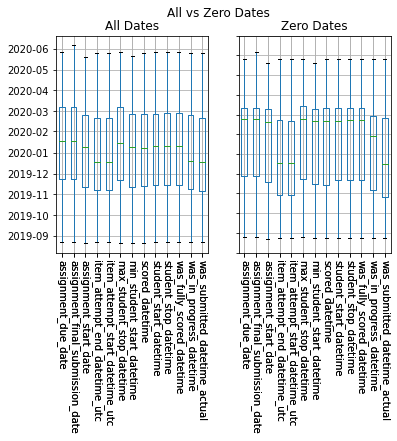

In [8]:
dual_date_boxplot(
    get_random_sample(filterDf),
    zeroDf,
    title1="All Dates",
    title2='Zero Dates',
    main='All vs Zero Dates'
)

- Median shifted from 1/15/20 to 2/20/20
  - assignment_due_date
  - assignment_final_submission_date
  - max_student_stop_datetime
  - min_student_start_datetime
  - scored_datetime
  - student_start_datetime
  - student_stop_datetime
  - was_fully_scored_datetime
- Median shifted from 12/15/20 to 2/20

###### Count observations with no response

In [6]:
zeroDf.filter(F.col('assessment_item_response_id').isNull()).count()

12393

- 12,393

###### Exclude observations with no response

In [7]:
noResponseDf = zeroDf.filter(F.col('assessment_item_response_id').isNull())

###### Are the remaining zero scores valid

In [8]:
pdDf = noResponseDf.toPandas()

crosstab_percent( pd.crosstab(pdDf.raw_score, pdDf.response_correctness) )

response_correctness,incorrect
raw_score,
0,100.0


- 100% correctly scored 0

###### Conclusion
- Zero scores are correct

In [9]:
finish_todo('Investigate 31084 zero values in raw_score')